# Exercises part II: branching process

The code below extract the probability distribution for the number of nodes at a few time points for a branching process with a Poisson offspring distribution.

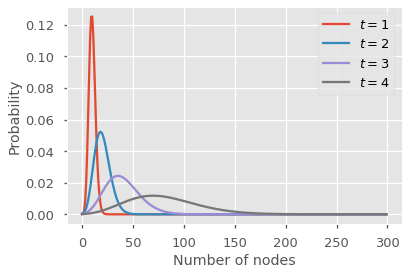

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot', 'seaborn-talk'])

R = 2.
Q = lambda x: np.exp(R*(x-1))
G0 = lambda x: x**5
N = 300
n = np.arange(N)
c = np.exp(2*np.pi*1j*n/N)

tset = {1,2,3,4}
x = c.copy()
for t in range(max(tset)+1):
    if t in tset:
        pn = abs(np.fft.fft(G0(x))/N)
        plt.plot(n,pn, label=fr"$t = {t}$")
    x = Q(x)
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Number of nodes')
plt.show()

## Modeling overdispersion

Change the offspring distribution to a negative binomial, using the PGF



$$
\begin{align}
Q(x) = \left [1 + \frac{R}{\kappa}(1-x) \right]^{-\kappa} \;.
\end{align}
$$

Use different values of $\kappa > 0$ and see what happens. Take a very large value of $\kappa$ and compare with the Poisson case.
:::{tip}
Remember to adapt the support to avoid aliasing effects.
:::

## Probability of extinction

1. Set $\kappa = 0.1$ and now extend the time to a large value (e.g., $t = 10$ should be enough). You should observe that $p_0$ (the *probability of extinction*) converge to a certain value.
2. Change the initial condition $G_0(x)$ and see how this affects $p_0$ for large $t$.
3. Now vary $R$. Can you find a critical value $R_\mathrm{c}$ such that $p_0 = 1$ for all $R < R_\mathrm{c}$? Does this value depend on $G_0(x)$ or $\kappa$?